# 加入隐藏层和正则化

之前没有隐藏层是下图
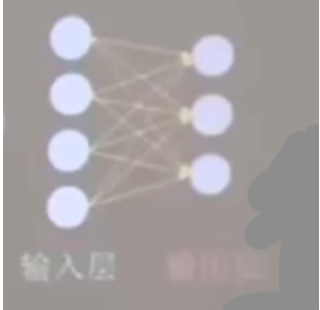

## 激活函数的选取

对于二分类问题，在输出层可以选择 sigmoid 函数。

对于多分类问题，在输出层可以选择 softmax 函数。

## 一层隐藏层

Epoch 0, loss: 0.23418034613132477
Epoch 0, Test accuracy: 0.26666666666666666
Epoch 1, loss: 0.23345022648572922
Epoch 1, Test accuracy: 0.26666666666666666
Epoch 2, loss: 0.23277023434638977
Epoch 2, Test accuracy: 0.26666666666666666
Epoch 3, loss: 0.23213543370366096
Epoch 3, Test accuracy: 0.26666666666666666
Epoch 4, loss: 0.2315417118370533
Epoch 4, Test accuracy: 0.26666666666666666
Epoch 5, loss: 0.2309890165925026
Epoch 5, Test accuracy: 0.26666666666666666
Epoch 6, loss: 0.23047563806176186
Epoch 6, Test accuracy: 0.26666666666666666
Epoch 7, loss: 0.23000476509332657
Epoch 7, Test accuracy: 0.26666666666666666
Epoch 8, loss: 0.22956852987408638
Epoch 8, Test accuracy: 0.26666666666666666
Epoch 9, loss: 0.2291661947965622
Epoch 9, Test accuracy: 0.26666666666666666
Epoch 10, loss: 0.22879279777407646
Epoch 10, Test accuracy: 0.26666666666666666
Epoch 11, loss: 0.22844373062252998
Epoch 11, Test accuracy: 0.26666666666666666
Epoch 12, loss: 0.22811616212129593
Epoch 12, Test 

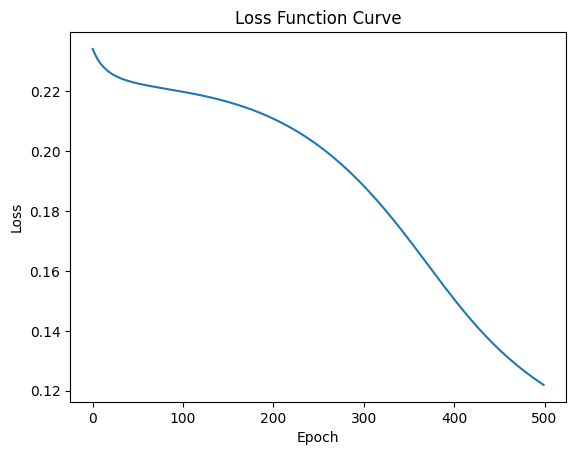

In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

# 导入数据集
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据
np.random.seed(16)
np.random.shuffle(x_data)
np.random.seed(16)
np.random.shuffle(y_data)
tf.random.set_seed(16)

# 分割训练集和测试集
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 数据类型转换
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# 创建数据批次
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 定义神经网络参数
# 第一层参数
w1 = tf.Variable(tf.random.truncated_normal([4, 10], stddev=0.1, seed=1))  # 隐藏层神经元数量为10
b1 = tf.Variable(tf.random.truncated_normal([10], stddev=0.1, seed=1))
# 第二层（输出层）参数
w2 = tf.Variable(tf.random.truncated_normal([10, 3], stddev=0.1, seed=1))  # 输出层神经元数量为3（类别数）
b2 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.01  # 学习率
epochs = 500  # 训练轮数
train_loss_results = []  # 存储训练损失
test_acc = []  # 存储测试准确率

# 训练过程
for epoch in range(epochs):
    loss_all = 0
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            # 通过隐藏层
            h1 = tf.nn.relu(tf.matmul(x_train, w1) + b1)
            # 输出层
            y = tf.nn.softmax(tf.matmul(h1, w2) + b2)
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        # 计算梯度并更新
        grads = tape.gradient(loss, [w1, b1, w2, b2])
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 记录每轮的平均损失
    train_loss_results.append(loss_all / len(train_db))
    print("Epoch {}, loss: {}".format(epoch, train_loss_results[-1]))

    # 测试集准确率
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        h1 = tf.nn.relu(tf.matmul(x_test, w1) + b1)
        y = tf.nn.softmax(tf.matmul(h1, w2) + b2)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]

    # 记录每轮的测试准确率
    test_acc.append(total_correct / total_number)
    print("Epoch {}, Test accuracy: {}".format(epoch, test_acc[-1]))

print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label="$Loss$")


加入隐藏层后模型性能下降可能有几个原因：

网络复杂度和数据复杂度不匹配：如果数据本身比较简单，**如鸢尾花数据集，加入过多的隐藏层可能导致模型过拟合，从而在测试集上表现不佳。**


隐藏层神经元数量：可能需要调整隐藏层神经元的数量。太多或太少的神经元都可能影响模型的性能。

权重初始化：不同的初始化方法可能对网络性能有显著影响。尝试不同的初始化方法可能会有所帮助。


批量大小：您可能需要调整批量大小。较小的批量通常可以提供更稳定和精确的梯度估计，但也可能增加训练时间。

为了改善性能，您可以尝试以下策略：

调整学习率和训练轮数。

尝试不同数量的神经元。

尝试不同的权重初始化方法。

加入正则化或Dropout以防过拟合。

调整批量大小。

实验和调整这些参数可以帮助您找到最优的网络结构和超参数，从而提高模型的性能。

### 初始化方法及其区别

<font color ="red">**随机初始化:**</font>

随机初始化可以打破对称性，确保每个神经元可以学习不同的特征。但如果初始化值太大或太小，可能会导致梯度消失或爆炸。

<font color ="red">**Xavier/Glorot初始化:**</font>

考虑到输入和输出神经元的数量，自动调整权重的尺度。适用于Sigmoid和tanh激活函数。

<font color ="red">**He初始化:**</font>

类似于Xavier初始化，但针对ReLU激活函数进行了优化。对于使用ReLU的网络，He初始化通常能提供更好的性能。

<font color ="red">**其他初始化方法:**</font>

还有许多其他初始化方法，如Lecun初始化、正态分布初始化等。
不同的初始化方法对网络的训练速度和最终性能有显著影响。选择合适的初始化方法可以帮助网络更快地收敛，并提高其最终性能。

In [2]:
### 初始化方法

initializer_he = tf.keras.initializers.HeNormal()
w1_he = tf.Variable(initializer_he([4, 10]))
b1_he = tf.Variable(tf.zeros([10]))

# 使用Xavier/Glorot初始化
initializer_xavier = tf.keras.initializers.GlorotNormal()
w2_xavier = tf.Variable(initializer_xavier([10, 3]))
b2_xavier = tf.Variable(tf.zeros([3]))



Epoch 0, loss: 0.4249100536108017
Epoch 0, Test accuracy: 0.8
Epoch 1, loss: 0.4245205968618393
Epoch 1, Test accuracy: 0.8
Epoch 2, loss: 0.42407143115997314
Epoch 2, Test accuracy: 0.8
Epoch 3, loss: 0.42354756593704224
Epoch 3, Test accuracy: 0.8
Epoch 4, loss: 0.422928549349308
Epoch 4, Test accuracy: 0.8
Epoch 5, loss: 0.42218564450740814
Epoch 5, Test accuracy: 0.8
Epoch 6, loss: 0.42127735912799835
Epoch 6, Test accuracy: 0.8
Epoch 7, loss: 0.420141339302063
Epoch 7, Test accuracy: 0.8
Epoch 8, loss: 0.41867975890636444
Epoch 8, Test accuracy: 0.8
Epoch 9, loss: 0.4167298749089241
Epoch 9, Test accuracy: 0.8
Epoch 10, loss: 0.41400132328271866
Epoch 10, Test accuracy: 0.8
Epoch 11, loss: 0.40992462635040283
Epoch 11, Test accuracy: 0.8
Epoch 12, loss: 0.40323347598314285
Epoch 12, Test accuracy: 0.8
Epoch 13, loss: 0.3906010016798973
Epoch 13, Test accuracy: 0.8
Epoch 14, loss: 0.36181599646806717
Epoch 14, Test accuracy: 0.8
Epoch 15, loss: 0.30245160311460495
Epoch 15, Test ac

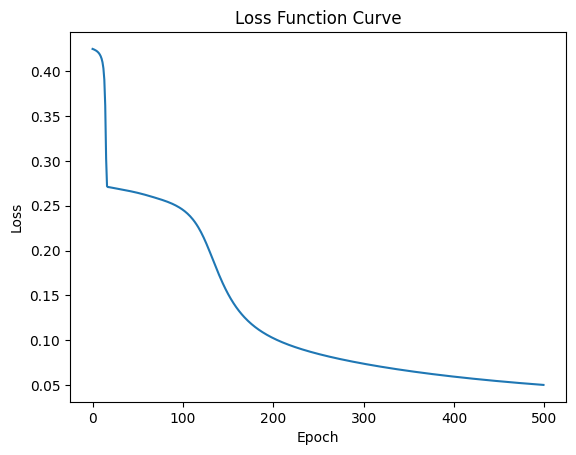

In [3]:
lr = 0.01  # 学习率
epochs = 500  # 训练轮数
train_loss_results = []  # 存储训练损失
test_acc = []  # 存储测试准确率

# 训练过程
for epoch in range(epochs):
    loss_all = 0
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            # 通过隐藏层
            h1 = tf.nn.relu(tf.matmul(x_train, w1_he) + b1_he)
            # 输出层
            y = tf.nn.softmax(tf.matmul(h1, w2_xavier) + b2_xavier)
            y_ = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        # 计算梯度并更新
        grads = tape.gradient(loss, [w1_he, b1_he, w2_xavier, b2_xavier])
        w1_he.assign_sub(lr * grads[0])
        b1_he.assign_sub(lr * grads[1])
        w2_xavier.assign_sub(lr * grads[2])
        b2_xavier.assign_sub(lr * grads[3])

    # 记录每轮的平均损失
    train_loss_results.append(loss_all / len(train_db))
    print("Epoch {}, loss: {}".format(epoch, train_loss_results[-1]))

    # 测试集准确率
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        h1 = tf.nn.relu(tf.matmul(x_test, w1) + b1)
        y = tf.nn.softmax(tf.matmul(h1, w2) + b2)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]

    # 记录每轮的测试准确率
    test_acc.append(total_correct / total_number)
    print("Epoch {}, Test accuracy: {}".format(epoch, test_acc[-1]))

print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label="$Loss$")

### 使用optuna优化框架来优化隐藏层神经元数目和学习率

In [5]:
import optuna
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# 准备数据
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=16)

# 转换数据类型
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# 定义目标函数进行优化
def objective(trial):
    # 超参数搜索空间
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-1)
    hidden_units = trial.suggest_categorical('hidden_units', [5, 10, 20, 30, 50])
    
    # 神经网络参数初始化
    initializer_he = tf.keras.initializers.HeNormal()
    w1_he = tf.Variable(initializer_he([4, hidden_units]))
    b1_he = tf.Variable(tf.zeros([hidden_units]))
    initializer_xavier = tf.keras.initializers.GlorotNormal()
    w2_xavier = tf.Variable(initializer_xavier([hidden_units, 3]))
    b2_xavier = tf.Variable(tf.zeros([3]))

    # 训练轮数
    epochs = 500
    train_loss_results = []
    test_acc = []

    # 使用tf.data进行批处理
    train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
    test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

    # 训练过程
    for epoch in range(epochs):
        loss_all = 0
        for step, (x_batch_train, y_batch_train) in enumerate(train_db):
            with tf.GradientTape() as tape:
                # 通过隐藏层
                h1 = tf.nn.relu(tf.matmul(x_batch_train, w1_he) + b1_he)
                # 输出层
                y = tf.nn.softmax(tf.matmul(h1, w2_xavier) + b2_xavier)
                y_ = tf.one_hot(y_batch_train, depth=3)
                loss = tf.reduce_mean(tf.square(y_ - y))
                loss_all += loss.numpy()
            # 计算梯度并更新
            grads = tape.gradient(loss, [w1_he, b1_he, w2_xavier, b2_xavier])
            w1_he.assign_sub(lr * grads[0])
            b1_he.assign_sub(lr * grads[1])
            w2_xavier.assign_sub(lr * grads[2])
            b2_xavier.assign_sub(lr * grads[3])

        train_loss_results.append(loss_all / len(train_db))

        # 测试集准确率
        total_correct, total_number = 0, 0
        for x_batch_test, y_batch_test in test_db:
            h1 = tf.nn.relu(tf.matmul(x_batch_test, w1_he) + b1_he)
            y = tf.nn.softmax(tf.matmul(h1, w2_xavier) + b2_xavier)
            pred = tf.argmax(y, axis=1)
            pred = tf.cast(pred, dtype=y_batch_test.dtype)
            correct = tf.cast(tf.equal(pred, y_batch_test), dtype=tf.int32)
            correct = tf.reduce_sum(correct)
            total_correct += int(correct)
            total_number += x_batch_test.shape[0]
        test_acc.append(total_correct / total_number)

    # 返回验证集上的准确率
    return np.mean(test_acc)

# 创建一个Optuna study对象并优化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 输出优化结果
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-01-05 11:23:48,556] A new study created in memory with name: no-name-6ac5f0a8-e312-462f-8568-57f41ddac20f
C:\Users\PC\AppData\Local\Temp\ipykernel_9688\3126842677.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-1)
[I 2024-01-05 11:23:56,875] Trial 0 finished with value: 0.8029999999999999 and parameters: {'lr': 0.0063357512295703095, 'hidden_units': 30}. Best is trial 0 with value: 0.8029999999999999.
[I 2024-01-05 11:24:05,147] Trial 1 finished with value: 0.6837333333333331 and parameters: {'lr': 0.00036272700461277205, 'hidden_units': 10}. Best is trial 0 with value: 0.8029999999999999.
[I 2024-01-05 11:24:13,413] Trial 2 finished with value: 0.5465999999999999 and parameters: {'lr': 0.0003227625727614853, 'hidden_units': 30}. Best is trial 0 with value: 0.80299999999

Number of finished trials:  50
Best trial:
Value: 0.9719333333333334
Params: 
    lr: 0.0034141149324614112
    hidden_units: 30


Epoch 0, loss: 0.4167, Test accuracy: 0.2667
Epoch 1, loss: 0.4063, Test accuracy: 0.2667
Epoch 2, loss: 0.3799, Test accuracy: 0.2667
Epoch 3, loss: 0.3049, Test accuracy: 0.4000
Epoch 4, loss: 0.2134, Test accuracy: 0.5000
Epoch 5, loss: 0.1902, Test accuracy: 0.5000
Epoch 6, loss: 0.1869, Test accuracy: 0.5000
Epoch 7, loss: 0.1862, Test accuracy: 0.5000
Epoch 8, loss: 0.1861, Test accuracy: 0.5000
Epoch 9, loss: 0.1860, Test accuracy: 0.5000
Epoch 10, loss: 0.1860, Test accuracy: 0.5000
Epoch 11, loss: 0.1859, Test accuracy: 0.5000
Epoch 12, loss: 0.1859, Test accuracy: 0.5000
Epoch 13, loss: 0.1859, Test accuracy: 0.5000
Epoch 14, loss: 0.1859, Test accuracy: 0.5000
Epoch 15, loss: 0.1859, Test accuracy: 0.5000
Epoch 16, loss: 0.1859, Test accuracy: 0.5000
Epoch 17, loss: 0.1859, Test accuracy: 0.5000
Epoch 18, loss: 0.1859, Test accuracy: 0.5000
Epoch 19, loss: 0.1859, Test accuracy: 0.5000
Epoch 20, loss: 0.1859, Test accuracy: 0.5000
Epoch 21, loss: 0.1858, Test accuracy: 0.500

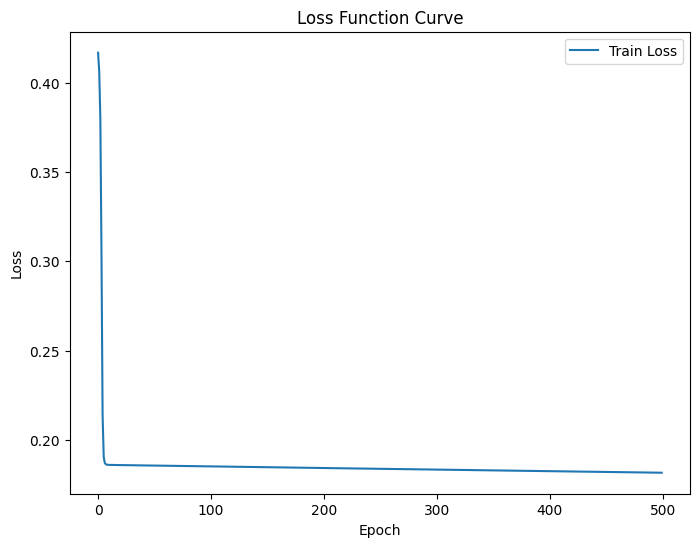

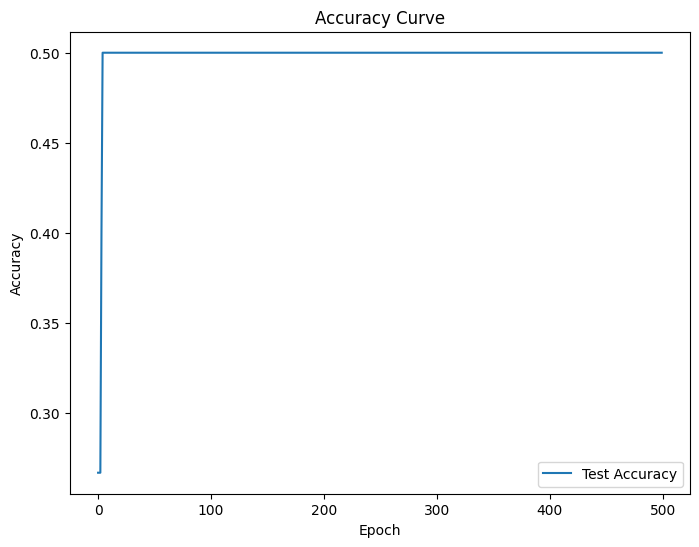

In [8]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=16)

# 数据类型转换
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# 初始化参数
lr = 0.0034141149324614112
hidden_units = 30
initializer_he = tf.keras.initializers.HeNormal(seed=16)
w1_he = tf.Variable(initializer_he([4, hidden_units]))
b1_he = tf.Variable(tf.zeros([hidden_units]))
initializer_xavier = tf.keras.initializers.GlorotNormal(seed=16)
w2_xavier = tf.Variable(initializer_xavier([hidden_units, 3]))
b2_xavier = tf.Variable(tf.zeros([3]))

# 训练参数
epochs = 500
train_loss_results = []
test_acc = []

# 训练过程
for epoch in range(epochs):
    loss_all = 0
    for step, (x_train_batch, y_train_batch) in enumerate(train_db):
        with tf.GradientTape() as tape:
            # 通过隐藏层
            h1 = tf.nn.relu(tf.matmul(x_train_batch, w1_he) + b1_he)
            # 输出层
            y = tf.nn.softmax(tf.matmul(h1, w2_xavier) + b2_xavier)
            y_ = tf.one_hot(y_train_batch, depth=3)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        # 计算梯度并更新
        grads = tape.gradient(loss, [w1_he, b1_he, w2_xavier, b2_xavier])
        w1_he.assign_sub(lr * grads[0])
        b1_he.assign_sub(lr * grads[1])
        w2_xavier.assign_sub(lr * grads[2])
        b2_xavier.assign_sub(lr * grads[3])
    
    # 记录每轮的平均损失
    train_loss_results.append(loss_all / len(train_db))

    # 测试集准确率
    total_correct, total_number = 0, 0
    for x_test_batch, y_test_batch in test_db:
        h1 = tf.nn.relu(tf.matmul(x_test_batch, w1_he) + b1_he)
        y = tf.nn.softmax(tf.matmul(h1, w2_xavier) + b2_xavier)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test_batch.dtype)
        correct = tf.cast(tf.equal(pred, y_test_batch), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test_batch.shape[0]
    
    # 记录每轮的测试准确率
    test_acc.append(total_correct / total_number)
    print("Epoch {}, loss: {:.4f}, Test accuracy: {:.4f}".format(epoch, train_loss_results[-1], test_acc[-1]))

print("--------------------------")

# 绘制损失曲线
plt.figure(figsize=(8, 6))
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label="Train Loss")
plt.legend()
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(8, 6))
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.show()


模型的损失（loss）快速下降之后便稳定在一个相对较高的值，同时测试准确率（accuracy）在训练过程中并没有显著提高，始终停留在50%。这种情况通常意味着以下几个可能：

模型未能学习到有效的特征：可能是由于模型结构不适合问题、数据预处理不当（例如，需要特征缩放）、或者是隐藏层的神经元数量设置不合理。

**学习率设置不当**：尽管使用Optuna找到了一个比较好的学习率，但这个值可能只是在初始阶段表现良好。学习率也可能需要随着训练的进行而调整（学习率衰减）。

**过拟合或欠拟合**：模型可能只是简单地记住了部分数据的标签而没有学到普遍规律（过拟合），或者模型太简单无法捕捉数据的复杂性（欠拟合）。

**数据不平衡**：如果某个类别的样本远远多于其他类别，模型可能倾向于预测那个多数的类别，这会导致准确率偏低。

**损失函数和评估指标不匹配**：使用的均方误差（MSE）损失函数可能不适合分类任务，通常分类问题会使用交叉熵损失函数。

为了解决这些问题，您可以尝试以下几种方法：

调整模型结构：增加或减少隐藏层的神经元数量，或者增加隐藏层的层数。

学习率衰减：随着训练的进行逐渐减小学习率。

改变损失函数：对于分类问题，尝试使用交叉熵损失函数而不是MSE。

增加正则化：使用如L1或L2正则化来防止过拟合。

<font color="red">不过这个和optuna输出的参数不一样，明明optuna输出最好的是Best trial: Value: 0.9719333333333334

